### Implementation on K- Nearest Neighbour Classififer(KNN)

We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not. 

#### Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [2]:
df = pd.read_csv("User_Data.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.ndim

2

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### Check for Null Values

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Visualization of Null Values 

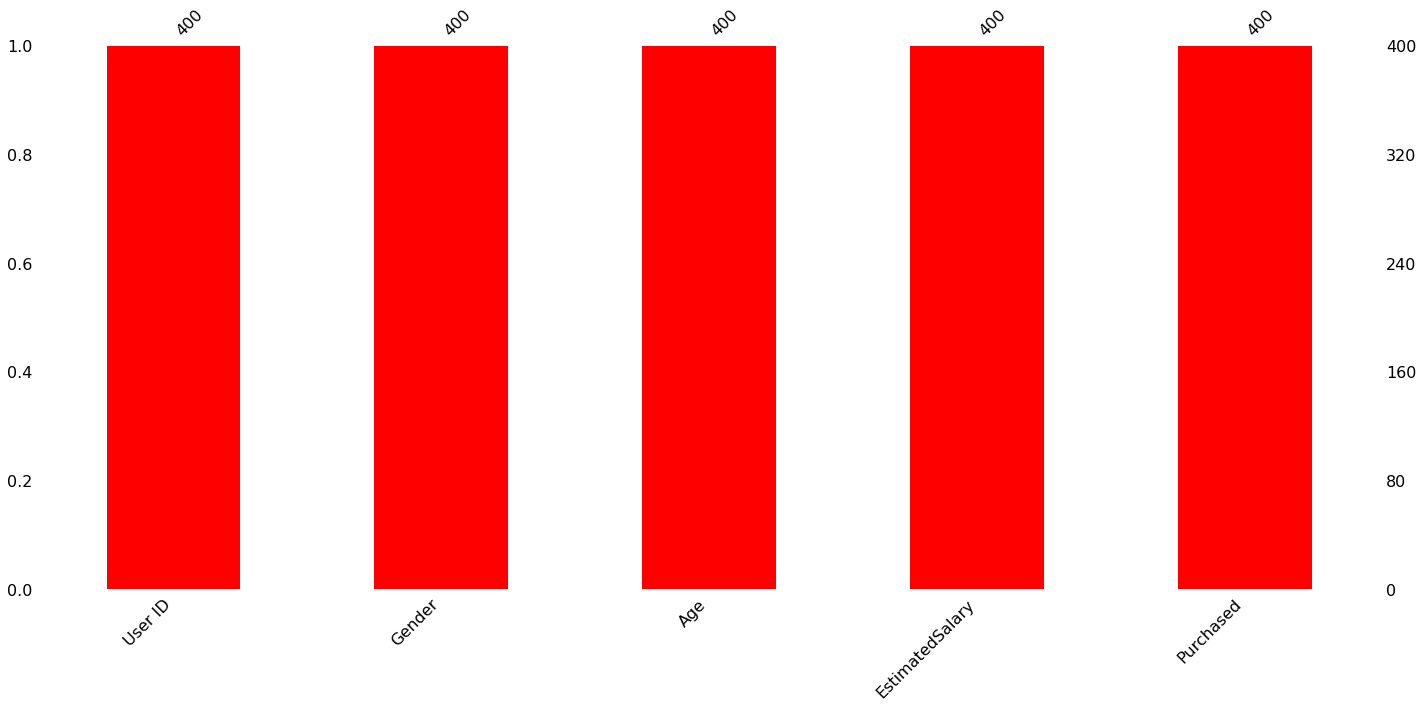

In [10]:
import missingno as msno
msno.bar(df,color  = "red")
plt.show()

#### Handle outliers

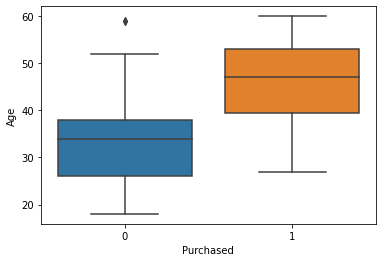

In [11]:
sns.boxplot(x = "Purchased",y ="Age",data = df)
plt.show()

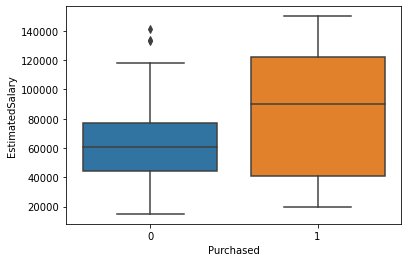

In [12]:
sns.boxplot(x = "Purchased",y = "EstimatedSalary",data = df)
plt.show()

In [13]:
max_threshold = df["Age"].quantile(0.95)
max_threshold

57.049999999999955

In [14]:
min_threshold = df["Age"].quantile(0.05)
min_threshold

21.0

In [15]:
df_new = df[(df["Age"]<max_threshold)]

In [16]:
df_new =df[(df["Age"]>min_threshold)]

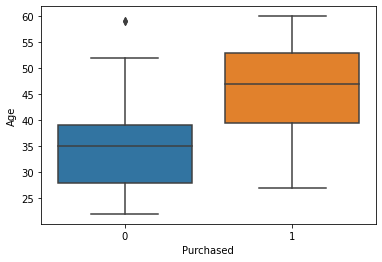

In [17]:
sns.boxplot(x = "Purchased",y ="Age",data = df_new)
plt.show()

In [18]:
df_final = df_new.drop("User ID", axis = 1)
df_final.head()

,Gender,Age,EstimatedSalary,Purchased
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
5,Male,27,58000,0
6,Female,27,84000,0


### Visualization 

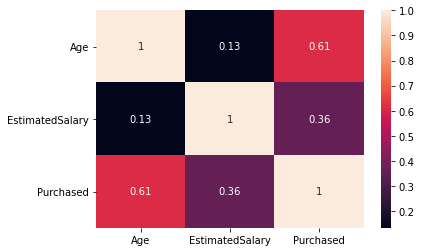

In [19]:
sns.heatmap(df_final.corr(),annot = True)
plt.show()

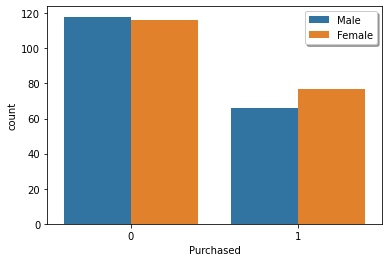

In [20]:
import warnings
warnings.simplefilter("ignore")
sns.countplot(df_final["Purchased"],hue =df_final["Gender"])
plt.legend(shadow = 1)
plt.show()

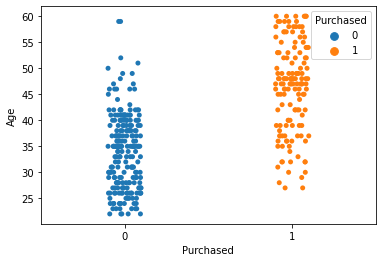

In [21]:
sns.stripplot(x = df_final['Purchased'],y = df_final['Age'],hue = df_final["Purchased"])
plt.show()

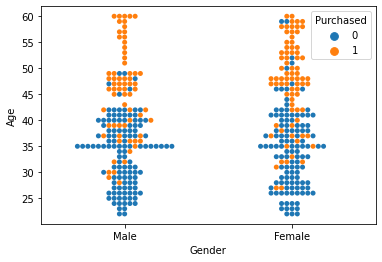

In [22]:
sns.swarmplot(x = df_final["Gender"],y = df_final["Age"],hue = df_final["Purchased"])
plt.show()

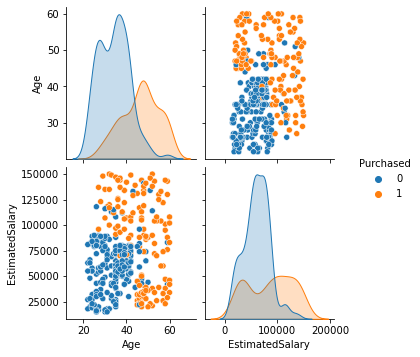

In [23]:
sns.pairplot(df_final,hue = "Purchased")
plt.show()

In [24]:
dummies = pd.get_dummies(df_final["Gender"])
df_new = pd.concat([df_final,dummies],axis = 1)
df_new = df_new.drop("Gender",axis = 1)
df_new.head()

,Age,EstimatedSalary,Purchased,Female,Male
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
5,27,58000,0,0,1
6,27,84000,0,1,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df_new.drop(["Purchased"],axis = 1)
y = df_new["Purchased"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 3)
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = Knn.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [31]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[57 12]
 [16 29]]


In [32]:
acc=accuracy_score(y_test,y_pred)
print("ACCURACY IS",acc*100,'%')


ACCURACY IS 75.43859649122807 %


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        69
           1       0.71      0.64      0.67        45

    accuracy                           0.75       114
   macro avg       0.74      0.74      0.74       114
weighted avg       0.75      0.75      0.75       114



Text(0.5, 1.0, 'Accuracy Score :0.75')

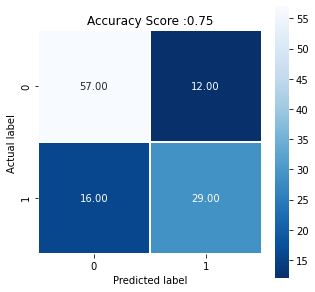

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{acc:.2f}'
plt.title(A)

